# Artificial „SU(3) quarks” in quantum dots
This notebook contain code for initialization: layout, Hamiltonian (from Layout), and diagonalization of Hamiltonian


In [1]:
# import necesary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Set necesary constants for initialization of layout and Hailtonian

In [2]:
# layout_size_x = 2   # number of atoms in X axis
# layout_size_y = 2   # number of atoms in Y axis

# t = 0.2               # parameter of Hamiltonian
t = 0.056865404718729244

Functions for initialization layout and ploting it

In [3]:
def initialize_layout(layout_size_x, layout_size_y):
    Layout = np.zeros((layout_size_y, layout_size_x), dtype=int)
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout[j][i] = k
            k += 1
    return Layout

In [4]:
def plot_layout(Layout):
    x = Layout.shape[1]
    y = Layout.shape[0]
    X = np.arange(1, x+1, 1, dtype=int)
    fig, axs = plt.subplots(1, 1)

    for i in range(y):
        Y=[]
        for j in range(x):
            Y.append(i+1)
        axs.scatter(X, Y, c='blue', linewidths=10)
    axs.set_aspect('equal', 'box')
    formatter = mticker.ScalarFormatter()
    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(mticker.FixedLocator([]))
    axs.yaxis.set_major_locator(mticker.FixedLocator([]))
    plt.show()

Function for initialization Hamiltonian fr0m layout

In [41]:
def initialize_hamiltonian(Layout, t):
    elements = Layout.shape[0]*Layout.shape[1]
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    Hamiltonian = np.zeros((elements,elements))
    # for j in range(elements-1):
    #     Hamiltonian[j, j + 1] = -t
    #    Hamiltonian[j + 1, j] = -t
       
    for i in range(layout_size_x-1):
        for j in range(layout_size_y-1):
            
            
            line = Layout[i][j] - 1
            jump1 = Layout[i+1][j] - 1
            jump2 = Layout[i][j+1] - 1
            Hamiltonian[line][jump1] = -t
            Hamiltonian[line][jump2] = -t
            Hamiltonian[jump1][line] = -t
            Hamiltonian[jump2][line] = -t
            
    
    j = layout_size_y-1
    for i in range(layout_size_x-1):
        line = Layout[i][j] - 1
        jump1 = Layout[i+1][j] - 1
        Hamiltonian[line][jump1] = -t
        Hamiltonian[jump1][line] = -t

    i = layout_size_x-1
    for j in range(layout_size_y-1):
        line = Layout[i][j] - 1
        jump1 = Layout[i][j+1] - 1
        Hamiltonian[line][jump1] = -t
        Hamiltonian[jump1][line] = -t
    
    for i in range(elements):
       Hamiltonian[i][i] = 4*t*0

    return Hamiltonian

In [5]:
def initialize_hamiltonian(Layout, t):
    elements = Layout.shape[0]*Layout.shape[1]
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    Hamiltonian = np.zeros((elements,elements))

    for i in range(layout_size_x):
        for j in range(layout_size_y):
            elem = Layout[i,j] - 1
            #print("elem = ",Layout[i,j], i, j)
            #print("neghbours: ")
            next_x, prev_x, next_y, prev_y = neighbours(Layout, i, j, True)
            #print(next_x, prev_x, next_y, prev_y)
            Hamiltonian[next_x,elem] = -t
            Hamiltonian[prev_x,elem] = -t
            Hamiltonian[next_y,elem] = -t
            Hamiltonian[prev_y,elem] = -t
            Hamiltonian[elem,next_x] = -t
            Hamiltonian[elem,prev_x] = -t
            Hamiltonian[elem,next_y] = -t
            Hamiltonian[elem,prev_y] = -t

    for i in range(elements):
       Hamiltonian[i][i] = 4*t
       
    '''i = 0
    for row in Layout:
        j = 0
        for elem in row:
            print("elem = ",Layout[i,j])
            print("neghbours: ", neighbours(Layout, i, j, True))
            j += 1
        i += 1

    for i in range(layout_size_x):
        for j in range(layout_size_y):
            print("elem = ",Layout[i,j], i, j)
            print("neghbours: ")
            next_x, prev_x, next_y, prev_y = neighbours(Layout, i, j, True)
            print(next_x, prev_x, next_y, prev_y)
            Hamiltonian[next_x,j] = -t
            Hamiltonian[j,next_x] = -t

            Hamiltonian[prev_x,j] = -t
            Hamiltonian[j, prev_x] = -t

            Hamiltonian[i,next_y] = -t
            Hamiltonian[next_y,i] = -t

            Hamiltonian[i,prev_y] = -t
            Hamiltonian[prev_y,i] = -t

    i , j = 1,1
    elem = Layout[i,j] -1
    print("elem = ",Layout[i,j], i, j)
    print("neghbours: ")
    next_x, prev_x, next_y, prev_y = neighbours(Layout, i, j, True)
    print(next_x, prev_x, next_y, prev_y)
    Hamiltonian[next_x,elem] = -t
    Hamiltonian[prev_x,elem] = -t
    Hamiltonian[next_y,elem] = -t
    Hamiltonian[prev_y,elem] = -t
    Hamiltonian[elem,next_x] = -t
    Hamiltonian[elem,prev_x] = -t
    Hamiltonian[elem,next_y] = -t
    Hamiltonian[elem,prev_y] = -t
    
    if next_x != j:
        Hamiltonian[next_x,j] = -t
        Hamiltonian[j,next_x] = -t

    if prev_x != j:
        Hamiltonian[prev_x,j] = -t
        Hamiltonian[j, prev_x] = -t

    if next_y != i:
        Hamiltonian[i,next_y] = -t
        Hamiltonian[next_y,i] = -t

    if prev_y != i:
        Hamiltonian[i,prev_y] = -t
        Hamiltonian[prev_y,i] = -t'''
    
    return Hamiltonian

def neighbours(Layout, i, j, PBC:bool):
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    if PBC:
        #if j = layout_size_y-1:
        
        if j in range(1,layout_size_y-1):
            next_y = j + 1
            prev_y = j - 1
        elif j == 0:
            next_y = j + 1
            prev_y = layout_size_y-1
        else:
            next_y = 0
            prev_y = j - 1

        if i in range(1,layout_size_x-1):
            next_x = i + 1
            prev_x = i - 1
        elif i == 0:
            next_x = i + 1
            prev_x = layout_size_x-1
        else:
            next_x = 0
            prev_x = i - 1
    else:
        pass
    
    '''print(Layout[next_x,j],
          Layout[prev_x,j],
          Layout[i,next_y],
          Layout[i,prev_y])'''
    # print(next_x, prev_x, next_y, prev_y)
    return Layout[i,prev_y]-1, Layout[i,next_y]-1,Layout[prev_x,j]-1,Layout[next_x,j]-1 
    # return next_x, prev_x, next_y, prev_y
        




In [6]:
x=4
initialize_hamiltonian(initialize_layout(x,x),t)

array([[ 0.22746162, -0.0568654 ,  0.        , -0.0568654 , -0.0568654 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.0568654 ,  0.        ,  0.        ,
         0.        ],
       [-0.0568654 ,  0.22746162, -0.0568654 ,  0.        ,  0.        ,
        -0.0568654 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.0568654 ,  0.        ,
         0.        ],
       [ 0.        , -0.0568654 ,  0.22746162, -0.0568654 ,  0.        ,
         0.        , -0.0568654 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.0568654 ,
         0.        ],
       [-0.0568654 ,  0.        , -0.0568654 ,  0.22746162,  0.        ,
         0.        ,  0.        , -0.0568654 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.0568654 ],
       [-0.0568654 ,  0.        ,  0

Function for diagonalization

In [12]:
def diagonalize_hamiltonian(Hamiltonian):
    w,v =  np.linalg.eig(Hamiltonian)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]
    diagonal = np.diag(w)
    print("\nwartosci wlasne:\n", w)
    # print("\nwektory wlasne:\n", v)
    # print('\nZdiagonalizowany Hamiltonian:\n', diagonal)
    plt.plot(w, 'o')
    plt.show()
    return diagonal


## Let's show how layout look like:

In [8]:
N = 4

[[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]


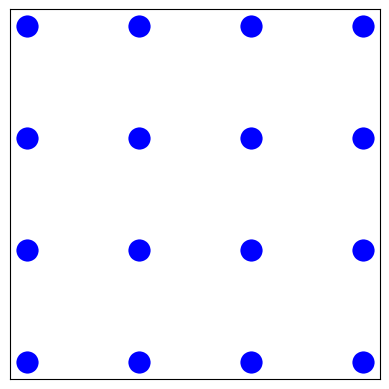

In [9]:
Layout = initialize_layout(N, N)
print(Layout)
plot_layout(Layout)

## Let's show how Hamiltonian look like:

In [10]:
Hamiltonian = initialize_hamiltonian(Layout, t)
print(Hamiltonian)

[[ 0.22746162 -0.0568654   0.         -0.0568654  -0.0568654   0.
   0.          0.          0.          0.          0.          0.
  -0.0568654   0.          0.          0.        ]
 [-0.0568654   0.22746162 -0.0568654   0.          0.         -0.0568654
   0.          0.          0.          0.          0.          0.
   0.         -0.0568654   0.          0.        ]
 [ 0.         -0.0568654   0.22746162 -0.0568654   0.          0.
  -0.0568654   0.          0.          0.          0.          0.
   0.          0.         -0.0568654   0.        ]
 [-0.0568654   0.         -0.0568654   0.22746162  0.          0.
   0.         -0.0568654   0.          0.          0.          0.
   0.          0.          0.         -0.0568654 ]
 [-0.0568654   0.          0.          0.          0.22746162 -0.0568654
   0.         -0.0568654  -0.0568654   0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.0568654   0.          0.         -0.0568654   0.227461

In [63]:
import pandas as pd 

In [58]:
np.savetxt('arr.csv', Hamiltonian, delimiter=',')

In [185]:
print(type(Hamiltonian))
df = pd.DataFrame(Hamiltonian)
df.to_csv("Desktop.csv" ,index=False, header=False)

<class 'numpy.ndarray'>


In [53]:
# create a dummy array 
arr = np.arange(1,11).reshape(2,5) 
print(arr) 
  
# convert array into dataframe 
DF = pd.DataFrame(arr) 
  
# save the dataframe as a csv file 
DF.to_csv("data1.csv", delimiter = ",")

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


TypeError: NDFrame.to_csv() got an unexpected keyword argument 'delimiter'

## Let's show how Hamiltonian look like after diagonalization:


wartosci wlasne:
 [-1.30104261e-17  1.13730809e-01  1.13730809e-01  1.13730809e-01
  1.13730809e-01  2.27461619e-01  2.27461619e-01  2.27461619e-01
  2.27461619e-01  2.27461619e-01  2.27461619e-01  3.41192428e-01
  3.41192428e-01  3.41192428e-01  3.41192428e-01  4.54923238e-01]


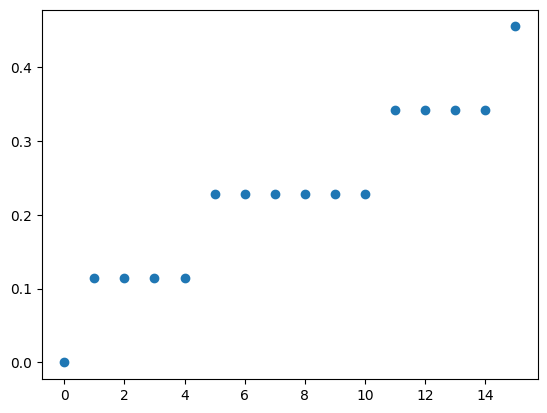

In [13]:
diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)

[[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]


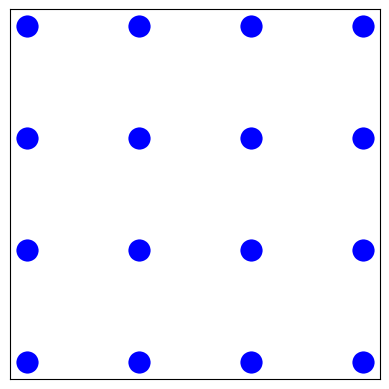

[[ 0.22746162 -0.0568654   0.         -0.0568654  -0.0568654   0.
   0.          0.          0.          0.          0.          0.
  -0.0568654   0.          0.          0.        ]
 [-0.0568654   0.22746162 -0.0568654   0.          0.         -0.0568654
   0.          0.          0.          0.          0.          0.
   0.         -0.0568654   0.          0.        ]
 [ 0.         -0.0568654   0.22746162 -0.0568654   0.          0.
  -0.0568654   0.          0.          0.          0.          0.
   0.          0.         -0.0568654   0.        ]
 [-0.0568654   0.         -0.0568654   0.22746162  0.          0.
   0.         -0.0568654   0.          0.          0.          0.
   0.          0.          0.         -0.0568654 ]
 [-0.0568654   0.          0.          0.          0.22746162 -0.0568654
   0.         -0.0568654  -0.0568654   0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.0568654   0.          0.         -0.0568654   0.227461

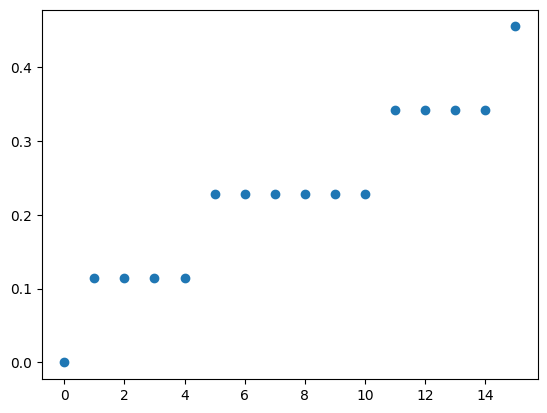

In [11]:
N = 4
Layout = initialize_layout(N, N)
print(Layout)
plot_layout(Layout)
Hamiltonian = initialize_hamiltonian(Layout, t)
print(Hamiltonian)
diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)